In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 40.8 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=dc6fd242c33f1993c735778c46ca4bc9c5a3cdb9111aa84131785337b8b7fdcb
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import streamlit as st
from sklearn.metrics import r2_score

In [ ]:
df= pd.read_csv("/content/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

<Axes: >

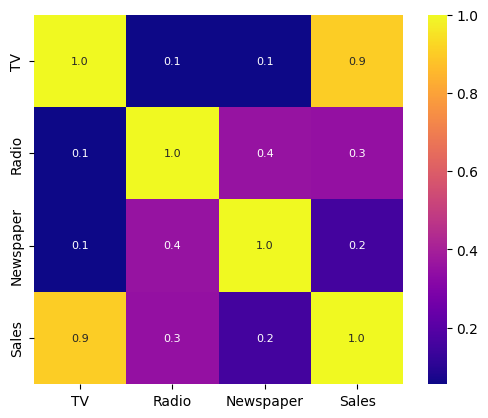

In [ ]:
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='plasma')

In [ ]:
correlation = df.corr()

for column in df.columns:
    print("correlation of ",column, ":")
    print(correlation[column])
    print("***"*10)

correlation of  TV :
TV           1.000000
Radio        0.054809
Newspaper    0.056648
Sales        0.901208
Name: TV, dtype: float64
******************************
correlation of  Radio :
TV           0.054809
Radio        1.000000
Newspaper    0.354104
Sales        0.349631
Name: Radio, dtype: float64
******************************
correlation of  Newspaper :
TV           0.056648
Radio        0.354104
Newspaper    1.000000
Sales        0.157960
Name: Newspaper, dtype: float64
******************************
correlation of  Sales :
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64
******************************


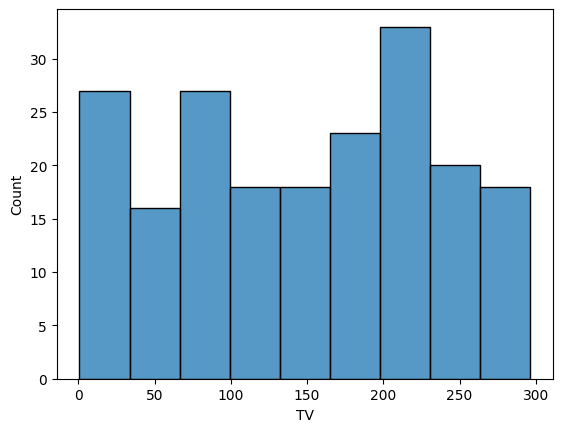

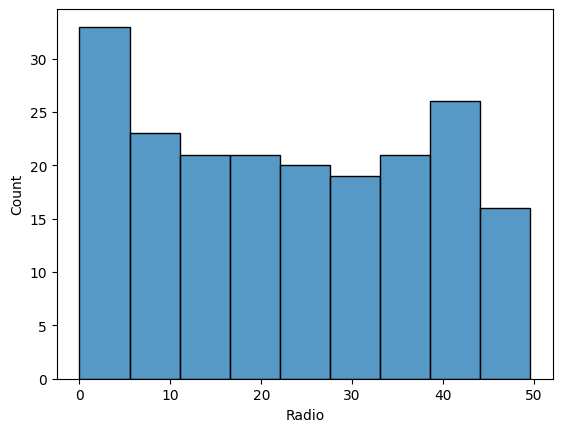

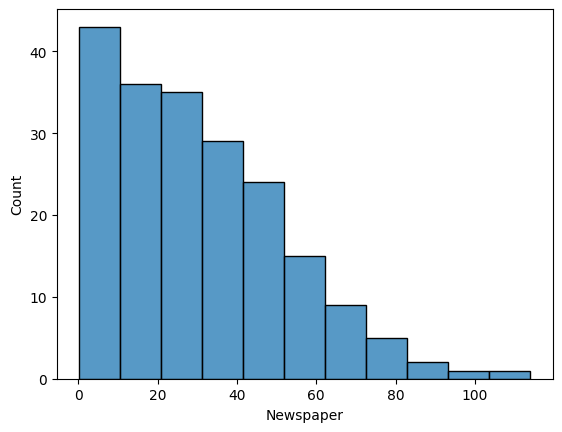

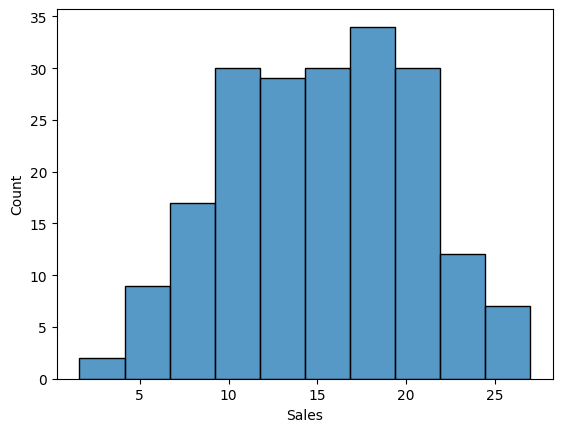

In [ ]:
for column in df.columns:
  sns.histplot(data=df, x=column, kde=False)

# Show the plot
  plt.show()

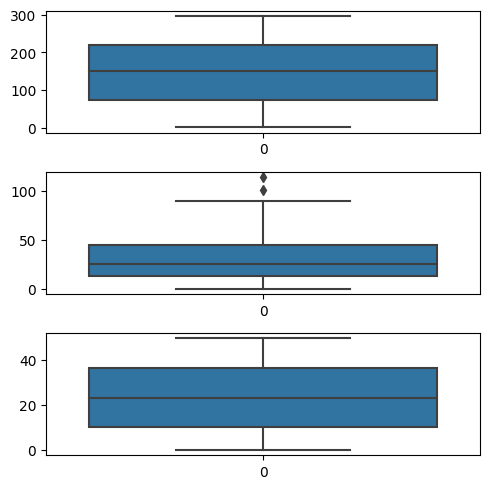

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

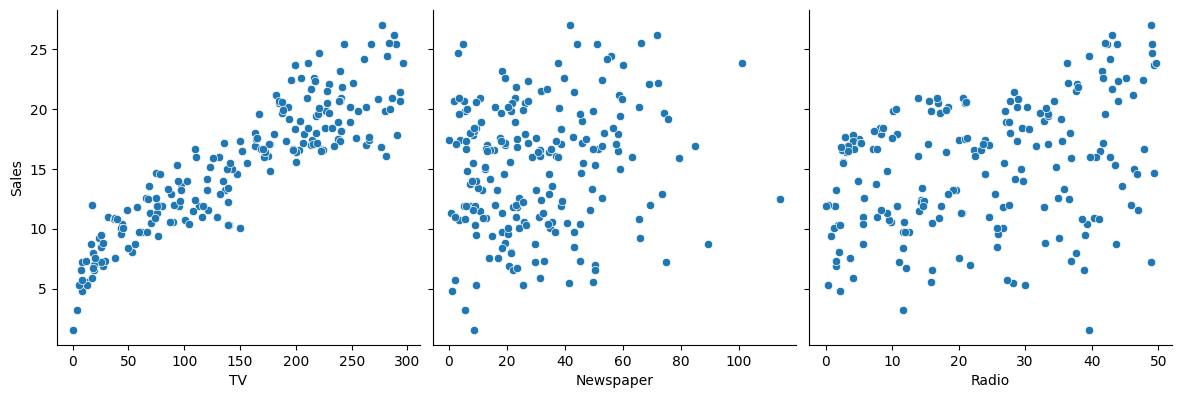

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
# Assuming you have already imported the necessary libraries and trained the model
X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

In [ ]:
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

LinearRegression()

In [ ]:
predicted_sales = model.predict(X)

# Print the predicted sales
print(predicted_sales)
# Calculate the R-squared score
r2 = r2_score(Y, predicted_sales)

# Print the R-squared score
print("R-squared:", r2)

[21.22097209 11.26824775 10.49620897 17.31244651 15.64413685 10.35633677
 11.2732847  13.27062458  5.31839603 15.78871013  8.8527202  18.88400523
  9.69879662 10.74921373 19.27328852 20.38554445 12.27105794 24.20214502
 10.5924398  15.20872794 19.49794066 18.10414656  7.06177654 18.87221072
  9.37145421 19.31996936 15.54479137 19.49216302 21.07865408 10.19471067
 23.61492832 12.64683045 10.08782551 21.2260486   9.98787085 20.89407055
 23.84503494 13.99342411  9.8404516  21.08344935 18.04712878 17.84885818
 23.57494339 16.79762772  8.75617872 16.57668108 10.58020572 22.13342743
 18.70257411  9.53181337 15.84670856 11.11990058 20.88243422 19.53008343
 22.01500291 20.76038994  8.04320903 14.10063486 21.4222098  19.25650785
  7.75915886 23.43911942 19.32168181 13.3867616  16.35231896  9.37729644
  8.97313482 13.7643628  20.49677834 21.13545307 18.75250649 12.14402868
  9.62178972 12.29082115 18.88048094 10.25121926  6.30053312 14.24014196
  8.1216232  11.77249775 11.64919966 18.13231302 10

In [43]:
%%writefile app.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import streamlit as st
from sklearn import metrics


df= pd.read_csv("/content/advertising.csv")
st.title("SALES PREDICTION")

X = df[['TV', 'Radio', 'Newspaper']]
Y = df['Sales']

TV=st.number_input("Enter TV Cost")
Radio=st.number_input("Enter Radio Cost")
Newspaper=st.number_input("Enter Newspaper CostD")
model = LinearRegression()
model.fit(X, Y)
accuracy = model.score(X, Y)
prediction=model.predict([[TV, Radio, Newspaper]])[0]
if st.button("PREDICT SALES"):
  st.header("Sales now is {}".format(int(prediction)))
  st.write("Accuracy is: ", accuracy, "With Linear Regression Model")

Overwriting app.py


In [44]:
!streamlit run /content/app.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.82.233.187



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.233.187:8501

npx: installed 22 in 2.065s
your url is: https://tame-keys-try.loca.lt
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:43